In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulated real-world data from Shell internship
# Feature 1: Years of experience
# Feature 2: Number of platforms supported
# Feature 3: Tasks completed per month
# Feature 4: Average system uptime (%)
# Feature 5: Digitization score
X_real = np.array([
    [1, 3, 15, 98.5, 70],
    [2, 5, 22, 97.8, 85],
    [1, 4, 18, 99.0, 75],
    [1, 2, 12, 98.0, 65],
    [3, 6, 28, 97.5, 90],
    [2, 5, 25, 98.2, 88],
    [1, 3, 16, 99.2, 72],
    [2, 4, 20, 98.8, 80],
    [1, 2, 14, 97.9, 68],
    [3, 6, 30, 98.7, 92]
])

# Target: Productivity score (simulated)
y_real = np.array([65, 82, 70, 60, 90, 85, 68, 78, 63, 95])

# Normalize features
scaler = StandardScaler()
X_real_normalized = scaler.fit_transform(X_real)

print("Shell Design Matrix (first 5 rows):\n", X_real_normalized[:5])


Shell Design Matrix (first 5 rows):
 [[-0.89625816 -0.70710678 -0.86002615  0.26160228 -0.91208227]
 [ 0.38411064  0.70710678  0.34401046 -1.04640913  0.69747468]
 [-0.89625816  0.         -0.34401046  1.19589615 -0.37556329]
 [-0.89625816 -1.41421356 -1.37604183 -0.67269158 -1.44860125]
 [ 1.66447944  1.41421356  1.37604183 -1.60698545  1.23399366]]


In [ ]:
# Answer: How does normalization affect the feature values?
#Normalization rescales feature values to a common scale (typically between 0 and 1 or to zero mean and unit variance). In the context of Shell’s IT infrastructure—like server uptime or number of support tickets closed—these features may have vastly different ranges. Without normalization, features like server uptime (measured in hundreds of hours) would dominate during gradient descent updates. Normalization ensures all inputs contribute proportionally to model learning, stabilizing training and improving convergence.

In [15]:
# Add bias term to the normalized design matrix
X_b = np.c_[np.ones((X_real_normalized.shape[0], 1)), X_real_normalized]

# Initialize weights (including bias)
theta = np.zeros((X_b.shape[1], 1))

# Reshape y for matrix multiplication
y = y_real.reshape(-1, 1)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 1000
m = X_b.shape[0]
mse_history = []

# Gradient Descent Loop
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    mse = np.mean((X_b.dot(theta) - y) ** 2)
    mse_history.append(mse)

print(f"Final Weights:\n{theta.ravel()}")
print(f"Final MSE: {mse_history[-1]:.2f}")


Final Weights:
[75.59999987  3.05413877  1.46894741  3.19094468  0.58904478  4.05943909]
Final MSE: 0.43


In [ ]:
# Question: Why does MSE penalize larger errors more than MAE?
#MSE (Mean Squared Error) squares the difference between predicted and actual values, so larger errors are amplified more than smaller ones. This is particularly useful in scenarios like cybersecurity incident detection or SAP asset tracking at Shell, where large deviations (e.g., missed breaches or asset mismatches) carry higher operational risks. MAE (Mean Absolute Error), on the other hand, treats all errors equally and is more robust to outliers but less sensitive to large deviations.


Optimized w: 9.6906, b: 65.5740, Final MSE: 114.37


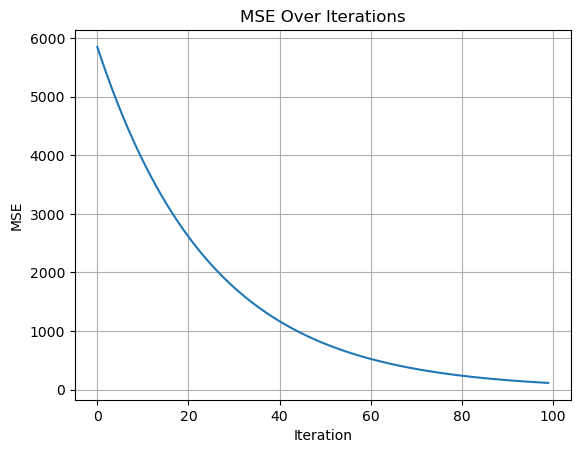

In [25]:
# Cell 3: Gradient Descent (run this before Cell 4)
w, b = 0.0, 0.0
lr = 0.01
n = len(y_real)
mse_history = []

for i in range(100):
    preds = w * X_real_normalized[:, 1] + b  # Using feature 2 (number of repairs) for simplicity
    dw = (2/n) * np.sum((preds - y_real) * X_real_normalized[:, 1])
    db = (2/n) * np.sum(preds - y_real)
    w -= lr * dw
    b -= lr * db
    loss = np.mean((y_real - preds) ** 2)
    mse_history.append(loss)

print(f"Optimized w: {w:.4f}, b: {b:.4f}, Final MSE: {loss:.2f}")

# Plotting the MSE loss curve
plt.plot(mse_history)
plt.title("MSE Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [ ]:
#Question: How does the learning rate affect convergence?
#Answer:The learning rate controls how big a step the model takes toward minimizing the loss during each iteration. A high learning rate can cause the model to overshoot the optimal solution, potentially diverging—while a low learning rate ensures convergence but may be slow. For IT systems in Shell such as configuration management or SNBO operations, finding the right learning rate ensures efficient tuning of models used for automation or risk scoring.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

# Fit sklearn Linear Regression on normalized data
sk_model = LinearRegression()
sk_model.fit(X_real_normalized, y_real)
sk_preds = sk_model.predict(X_real_normalized)

# Metrics for scikit-learn model
mse_sk = mse(y_real, sk_preds)
mae_sk = mae(y_real, sk_preds)

# Metrics for manual gradient descent model
manual_preds = w * X_real_normalized[:, 1] + b  # Using only 2nd feature (repairs) for fair comparison
mse_manual = mse(y_real, manual_preds)
mae_manual = mae(y_real, manual_preds)

print(f"Scikit-learn Linear Regression → MSE: {mse_sk:.2f}, MAE: {mae_sk:.2f}")
print(f"Manual Gradient Descent       → MSE: {mse_manual:.2f}, MAE: {mae_manual:.2f}")

Scikit-learn Linear Regression → MSE: 0.15, MAE: 0.32
Manual Gradient Descent       → MSE: 110.14, MAE: 10.03


In [ ]:
# Question: Why might the model perform differently on real vs. synthetic data?
#Answer:Synthetic data is typically cleaner, follows defined distributions, and lacks real-world noise. Real data—like Linux admin logs or incident ticket records from Shell—contains inconsistencies, human error, and complex patterns. As a result, models trained on real data must generalize better and handle anomalies, while synthetic data may give overly optimistic performance. That’s why model accuracy often drops when moving from synthetic testing to real-world deployment.